# Jupyter Graphviz anywidget

Render dot diagrams as SVG using graphviz wasm.

In [1]:
# In a pyodide environment, you need to install the package first
try:
    import jupyter_anywidget_graphviz
except:
    %pip install jupyter_anywidget_graphviz

# To access the panel, we need sidecar
# %pip install sidecar

In [2]:
from jupyter_anywidget_graphviz import graphviz_headless
%load_ext jupyter_anywidget_graphviz

g = graphviz_headless()

/lib/python3.12/site-packages/jupyter_anywidget_graphviz/__init__.py:26: UserWarning: You must install jupyter_ui_poll if you want to return cell responses / blocking waits (not JupyerLite); install necessary packages then restart the notebook kernel:%pip install jupyter_ui_poll
  warnings.warn(
/lib/python3.12/site-packages/jupyter_anywidget_graphviz/panel.py:13: UserWarning: Missing package (sidecar): run `pip install sidecar` before trying to access the panel.
  warnings.warn(


graphvizWidget(headless=True, response={'status': 'initialising'})

Display the response status and any SVG state (the latter should be empty):

In [3]:
g.response, g.svg

({'status': 'ready'}, '')

When first calling the magic, we need to specify which widget we want to use with the magic. Use the `-w / --widget-name` magic parameter to set this value via the cell block magic:

In [4]:
%%graphviz_magic --widget-name g
  strict graph {
    a -- b
    a -- b
    b -- a [color=blue]
  }

The response status and convenience svg property may be inspected. Note that if you run this quickly, they may not be set yet (the magic in its raw form is not blocking, and the graphviz function runs asynchronously)...

In [5]:
g.response, g.svg

({'status': 'completed',
  'svg': '<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 12.2.1 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="62pt" height="116pt"\n viewBox="0.00 0.00 62.00 116.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 112)">\n<polygon fill="white" stroke="none" points="-4,4 -4,-112 58,-112 58,4 -4,4"/>\n<!-- a -->\n<g id="node1" class="node">\n<title>a</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-90" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-85.8" font-family="Times,serif" font-size="14.00">a</text>\n</g>\n<!-- b -->\n<g id="node2" class="node">\n<title>b</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-18" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-13.8" font-family="Time

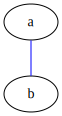

In [6]:
from IPython.display import SVG

SVG(g.svg)

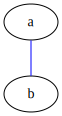

In [7]:
class graphVizSVG:
    def __init__(self, svg: str):
        self.svg = svg
    def _repr_svg_(self):
        return self.svg

graphVizSVG(g.svg)

We can now assume the widget used by the magic:

In [8]:
%%graphviz_magic
  strict graph {
    a -- b
    a -- b
    b -- a [color=red]
  }

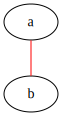

In [9]:
graphVizSVG(g.svg)

We can force a blocking behaviour (not in-browser WASM environments such as JupyterLite) and then embed the generated SVG by adding the embed flag (`-e`) or setting a default timeout for a blobking action (`-t`; the default is 5s): 

In [10]:
%%graphviz_magic -e -t 4
 strict graph {
    a -- b
    a -- b
    b -- a [color=green]
}

'No SVG?'

We can create a persistent inline widget whose display will follow the current widget state.

In [11]:
from jupyter_anywidget_graphviz import graphviz_inline

g = graphviz_inline()

graphvizWidget(response={'status': 'initialising'})

We can also set the widget used by the magic via line magic:

In [12]:
%setwidget g

We can call the magic directly having set the widget:

In [13]:
%%graphviz_magic
  strict graph {
    a -- b
    a -- b
    b -- a [color=cyan]
  }

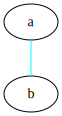

In [14]:
SVG(g.svg)

In [15]:
g.blocking_reply()
g.response

{'status': 'completed',
 'svg': '<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 12.2.1 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="62pt" height="116pt"\n viewBox="0.00 0.00 62.00 116.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 112)">\n<polygon fill="white" stroke="none" points="-4,4 -4,-112 58,-112 58,4 -4,4"/>\n<!-- a -->\n<g id="node1" class="node">\n<title>a</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-90" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-85.8" font-family="Times,serif" font-size="14.00">a</text>\n</g>\n<!-- b -->\n<g id="node2" class="node">\n<title>b</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-18" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-13.8" font-family="Times,

In [16]:
g.audio = True

In [17]:
g.render("ads")